In [3]:
import json
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
index_arr = ["random baseline", "word2vec euc-sim", "tfidf cos-sim", "bert cos-sim", "mfcc_bow cos-sim", "musicnn cos-sim", "ivec_256 cos-sim", "logfluc cos-sim", "resnet cos-sim", "early fusion cos-sim", "late fusion cos-sim"]

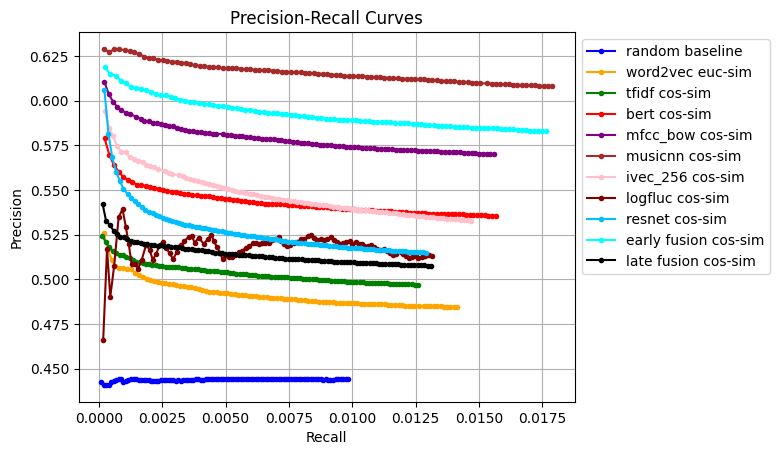

In [9]:
# Generate Precision-Recall Curves
file_path = 'metrics.json'

with open(file_path, 'r') as file:
    data = json.load(file)
    
colors =['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'maroon', 'deepskyblue', 'cyan', 'k']

 # i need eleven colors

for index, entry in enumerate(index_arr):
    recall_key = f"Recall-{entry}"
    precision_key = f"Precision-{entry}"

    plt.plot(data[index][precision_key], data[index][recall_key] , label=f'{entry}', marker='.', color=colors[index])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig("Precision-Recall Curves.png")
plt.show()

['Avg precision', 'Avg recall', 'Avg ndcg', 'Avg genre diversity', 'Genre coverage']


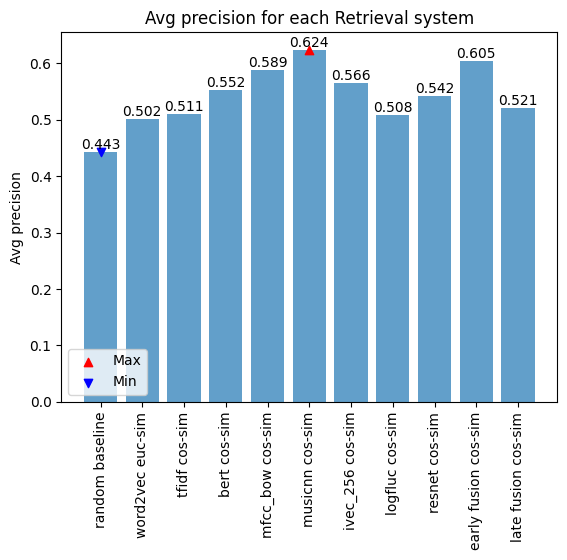

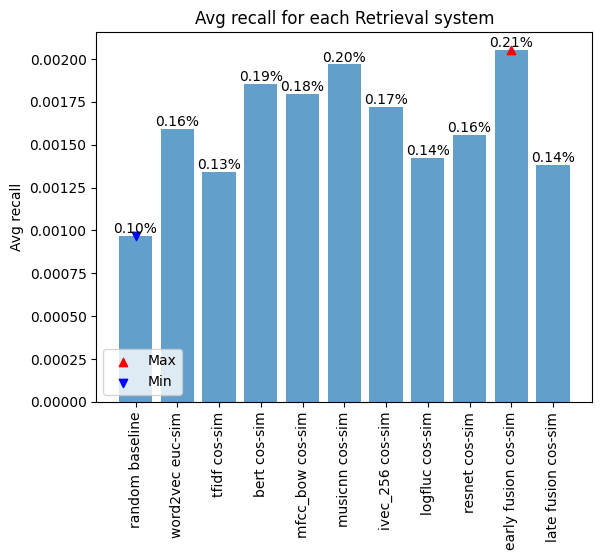

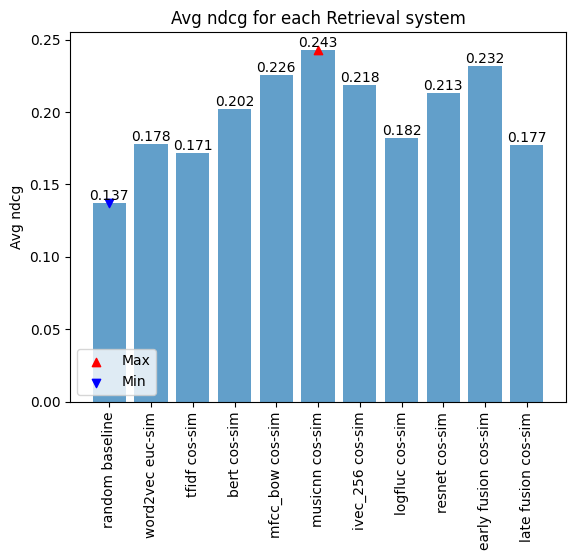

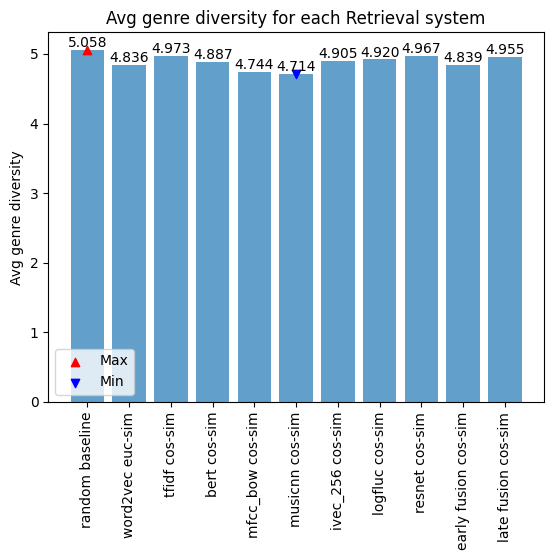

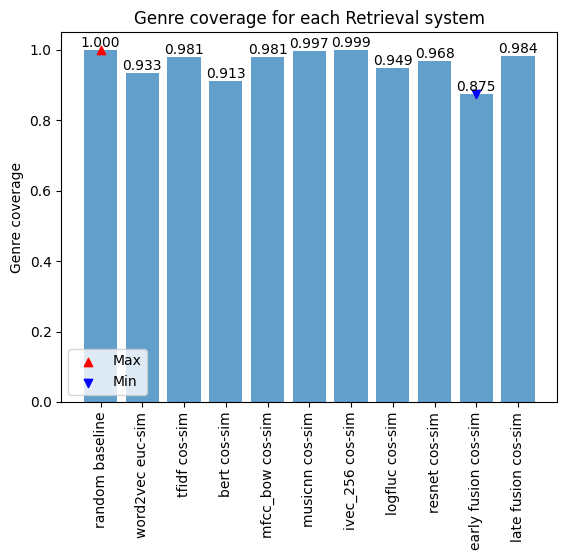

In [72]:
# Generate barplots mark min and max
import numpy as np


file_path = 'df_metrics.json'

with open(file_path, 'r') as file:
    data = json.load(file)

metrics = list(data[0].keys())

print(metrics)

# Create a separate plot for each metric
for metric in metrics:
    values = [rs[metric] for rs in data]
    max_index = values.index(max(values))
    min_index = values.index(min(values))

    plt.figure()
    plt.bar(range(len(data)), values, align='center', alpha=0.7)
    plt.xticks(np.arange(len(index_arr)),index_arr,rotation=90)

    plt.title(f'{metric} for each Retrieval system')
    # plt.xlabel('RS')
    plt.ylabel(metric)

    # Mark the maximum and minimum values
    plt.scatter(max_index, max(values), color='red', label='Max', marker='^')
    plt.scatter(min_index, min(values), color='blue', label='Min', marker='v')


    if metric == "Avg recall":
        for i, v in zip(range(len(data)), values):
            plt.text(i, v, f'{v*100:.2f}%', ha='center', va='bottom')
    else:
        for i, v in enumerate(values):
            plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

    plt.legend(loc='lower left')
    plt.show()

['Avg precision', 'Avg recall', 'Avg ndcg', 'Avg genre diversity', 'Genre coverage']


<Figure size 640x480 with 0 Axes>

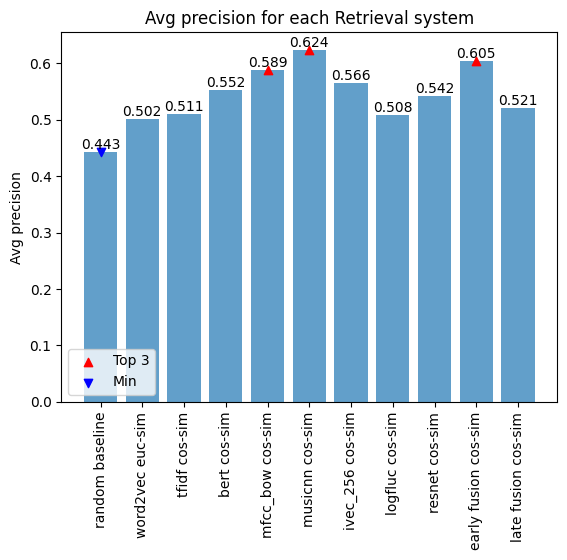

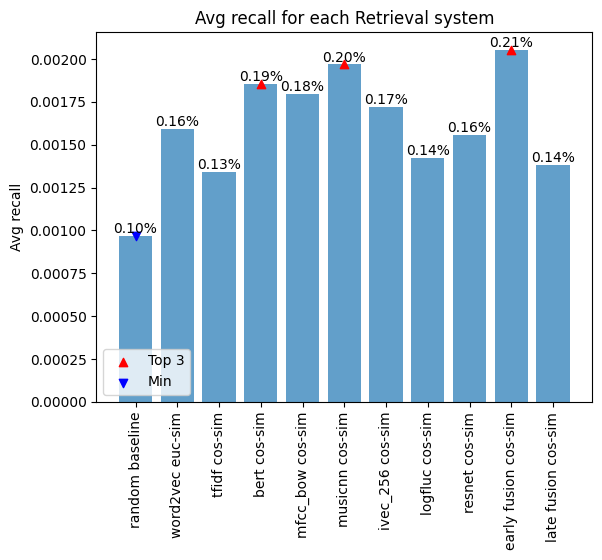

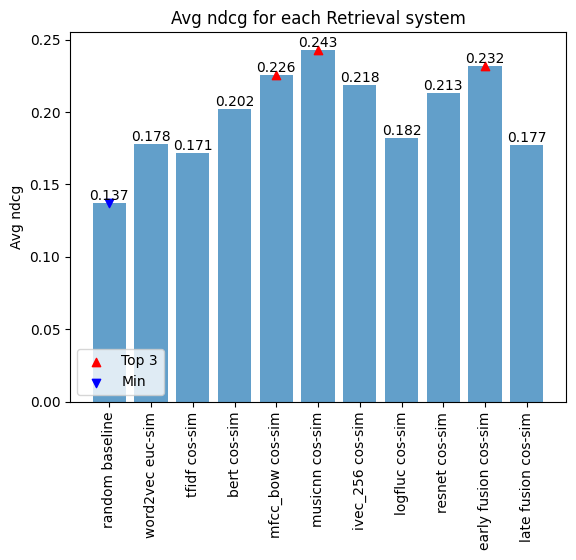

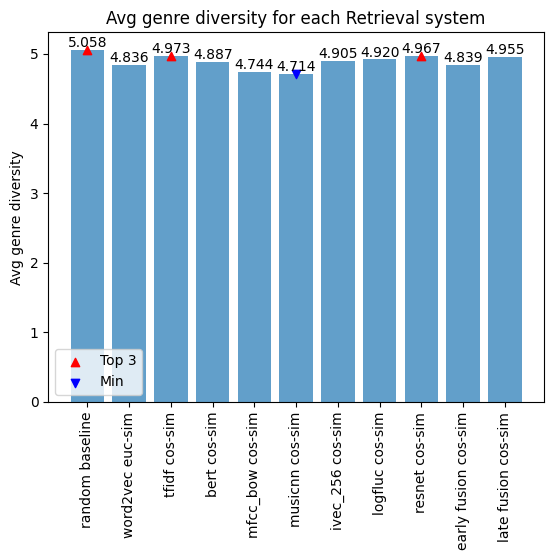

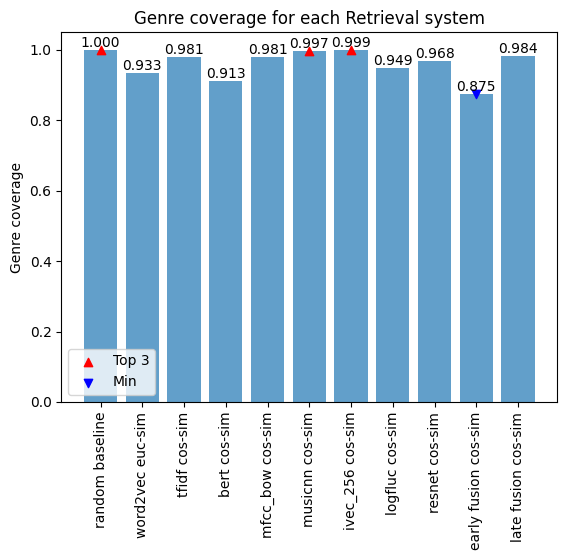

In [73]:
# Generate barplots show best 3
plt.clf()
import numpy as np


file_path = 'df_metrics.json'

with open(file_path, 'r') as file:
    data = json.load(file)

metrics = list(data[0].keys())

print(metrics)

# Create a separate plot for each metric
for metric in metrics:
    values = [rs[metric] for rs in data]
    sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)

    plt.figure()
    plt.bar(range(len(data)), values, align='center', alpha=0.7)
    plt.xticks(np.arange(len(index_arr)),index_arr,rotation=90)

    plt.title(f'{metric} for each Retrieval system')
    # plt.xlabel('RS')
    plt.ylabel(metric)

    plt.scatter(sorted_indices[:3], [values[i] for i in sorted_indices[:3]], color='red', label='Top 3', marker='^')
    plt.scatter(sorted_indices[-1], values[sorted_indices[-1]], color='blue', label='Min', marker='v')

    if metric == "Avg recall":
        for i, v in zip(range(len(data)), values):
            plt.text(i, v, f'{v*100:.2f}%', ha='center', va='bottom')
    else:
        for i, v in enumerate(values):
            plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

    plt.legend(loc='lower left')
    plt.show()

000

['Avg precision', 'Avg recall', 'Avg ndcg', 'Avg genre diversity', 'Genre coverage']


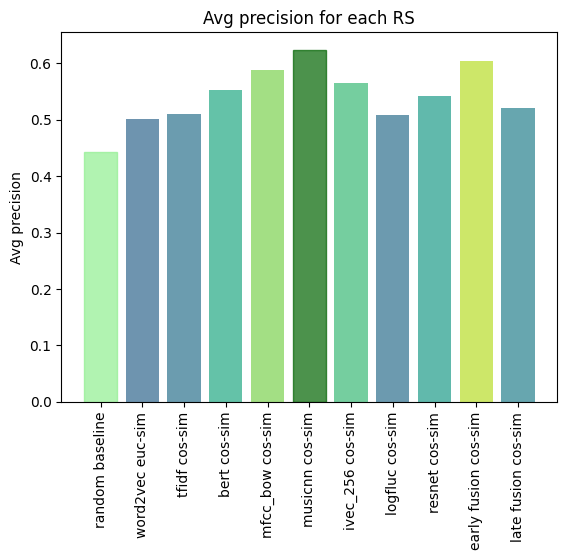

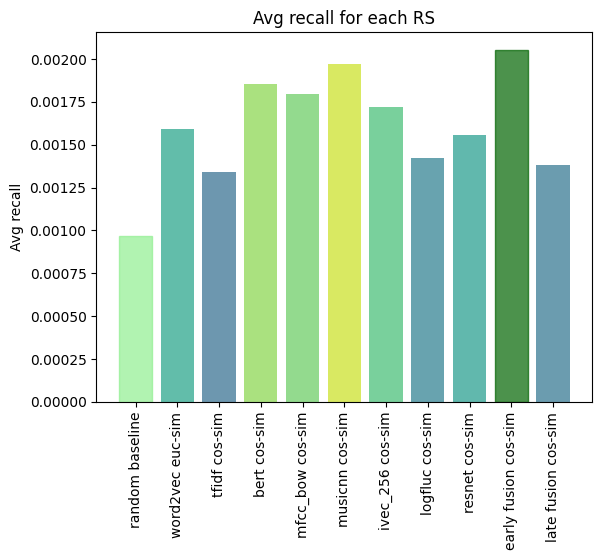

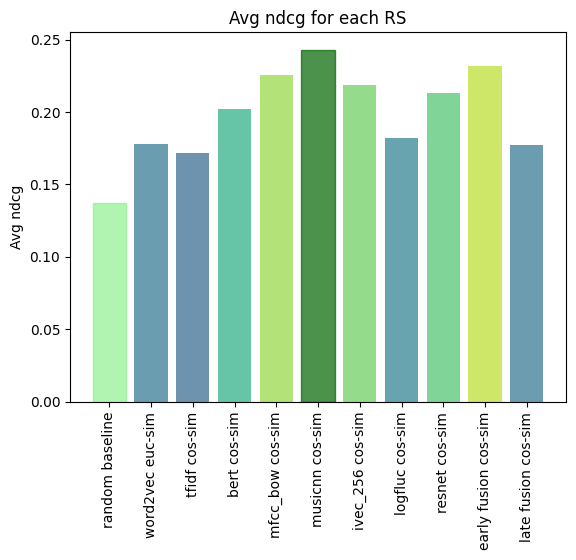

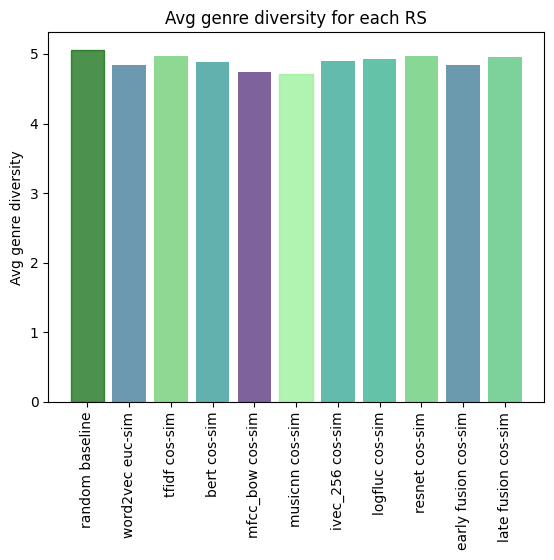

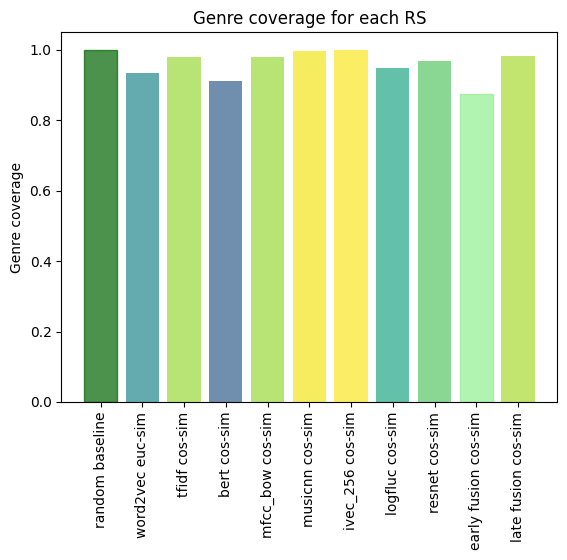

In [74]:
# Generate barplots color gradient

import numpy as np
import matplotlib.pyplot as plt

# Generate barplots
file_path = 'df_metrics.json'


with open(file_path, 'r') as file:
    data = json.load(file)

metrics = list(data[0].keys())

print(metrics)

# Create a separate plot for each metric
for metric in metrics:
    values = [rs[metric] for rs in data]
    max_index = values.index(max(values))
    min_index = values.index(min(values))

    # Normalize values to create a color gradient
    norm_values = (np.array(values) - min(values)) / (max(values) - min(values))
    colors = plt.cm.viridis(norm_values)  # You can choose another colormap


    plt.figure()
    bars = plt.bar(range(len(data)), values, color=colors, alpha=0.7) #, align='center'
    plt.xticks(np.arange(len(index_arr)), index_arr, rotation=90)

    plt.title(f'{metric} for each RS')
    # plt.xlabel('RS')
    plt.ylabel(metric)

    # Mark the maximum and minimum values
    bars[max_index].set_color('darkgreen')
    bars[min_index].set_color('lightgreen')


    plt.show()